<a href="https://colab.research.google.com/github/kirsten-fung/project_gss/blob/main/FINAL_gss_graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#! git clone https://github.com/kirsten-fung/project_gss

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/project_gss/cleaned_project_gss.csv')

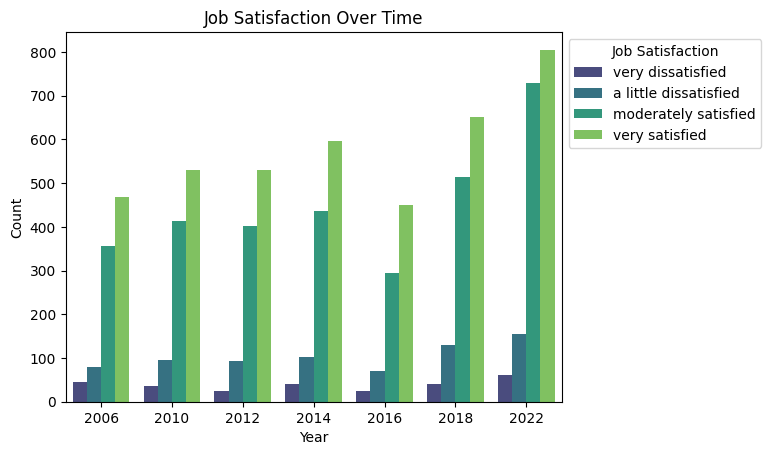

In [34]:
# Countplot of job satisfaction vs. year
sat_order = ['very dissatisfied','a little dissatisfied','moderately satisfied','very satisfied'] # want to order bars from least to most satisfied
plot = sns.countplot(data=df, x='year', hue='job_satisfaction', hue_order=sat_order, palette=sns.color_palette("viridis", len(sat_order)))

plot.set_title('Job Satisfaction Over Time') # add labels
plot.set_xlabel('Year')
plot.set_ylabel('Count')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

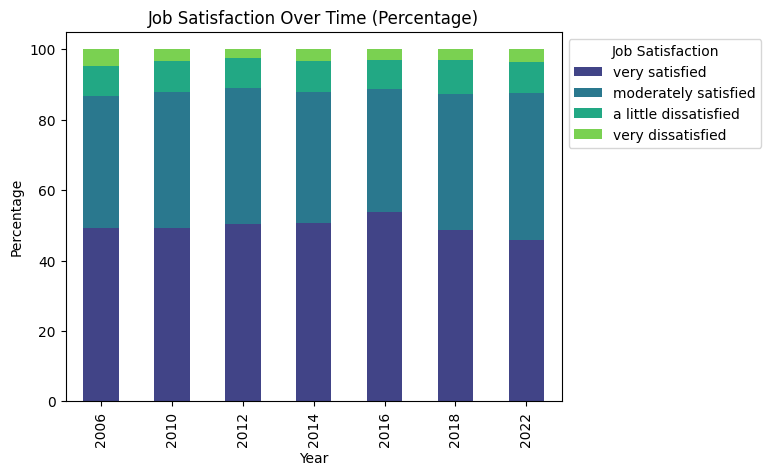

In [35]:
# Stacked bar of job satisfaction over time but as percentage of the year
sat_order = ['very satisfied', 'moderately satisfied', 'a little dissatisfied', 'very dissatisfied']

pivot = df.pivot_table(index='year', columns='job_satisfaction', aggfunc='size', fill_value=0) # get counts for each combination of year and satisfaction
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100 # convert counts to percent of overall year
pivot_percent = pivot_percent[sat_order] # order from most to least satisfied

plot = pivot_percent.plot(kind='bar', stacked=True, color=sns.color_palette("viridis", len(sat_order)))

plot.set_title('Job Satisfaction Over Time (Percentage)') # add labels
plot.set_xlabel('Year')
plot.set_ylabel('Percentage')
plt.legend(title='Job Satisfaction',bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

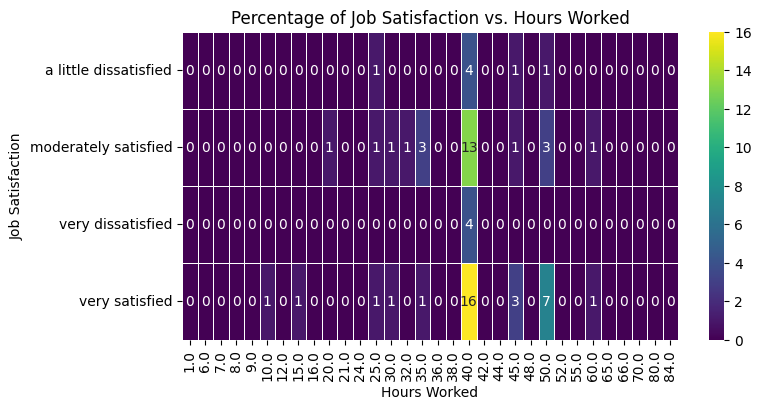

In [36]:
# Heatmap of overall job satisfaction vs. hours worked in percentage
data = df.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0) # get counts for each combination of job satisfaction and hours worked
data_percent = (data / data.sum().sum() * 100).astype(int) # convert counts to percent

plt.figure(figsize=(8, 4))
plot = sns.heatmap(data_percent, cmap='viridis', annot=True, fmt='d', linewidths=0.5)

plot.set_title('Percentage of Job Satisfaction vs. Hours Worked') # add labels
plot.set_xlabel('Hours Worked')
plot.set_ylabel('Job Satisfaction')
plt.show()

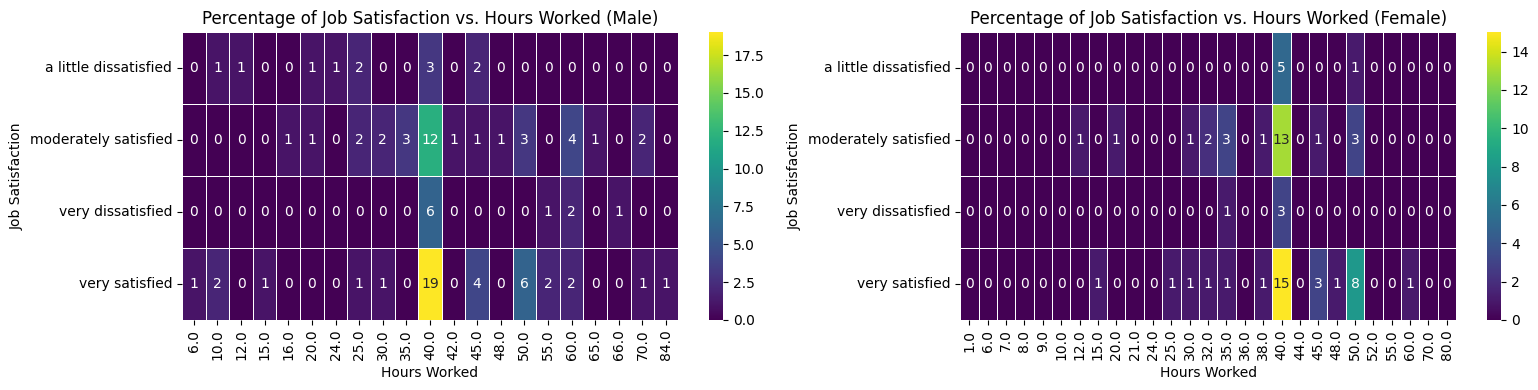

In [37]:
# Heatmap of overall job satisfaction vs. hours worked in percentage separated by sex (male and female)
df_male = df[df['sex'] == 'male'] # create new dataframe for male and female
df_female = df[df['sex'] == 'female']

data_m = df_male.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0) # get counts for each combination of job satisfaction and hours worked for male/female
data_f = df_female.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)

data_m_percent = (data_m / data_m.sum().sum() * 100).astype(int) # convert counts to percent
data_f_percent = (data_f / data_f.sum().sum() * 100).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_m = sns.heatmap(data_m_percent, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[0]) # plot male heatmap
plot_m.set_title('Percentage of Job Satisfaction vs. Hours Worked (Male)')
plot_m.set_xlabel('Hours Worked')
plot_m.set_ylabel('Job Satisfaction')

plot_f = sns.heatmap(data_f_percent, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[1]) # plot female heatmap
plot_f.set_title('Percentage of Job Satisfaction vs. Hours Worked (Female)')
plot_f.set_xlabel('Hours Worked')
plot_f.set_ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()

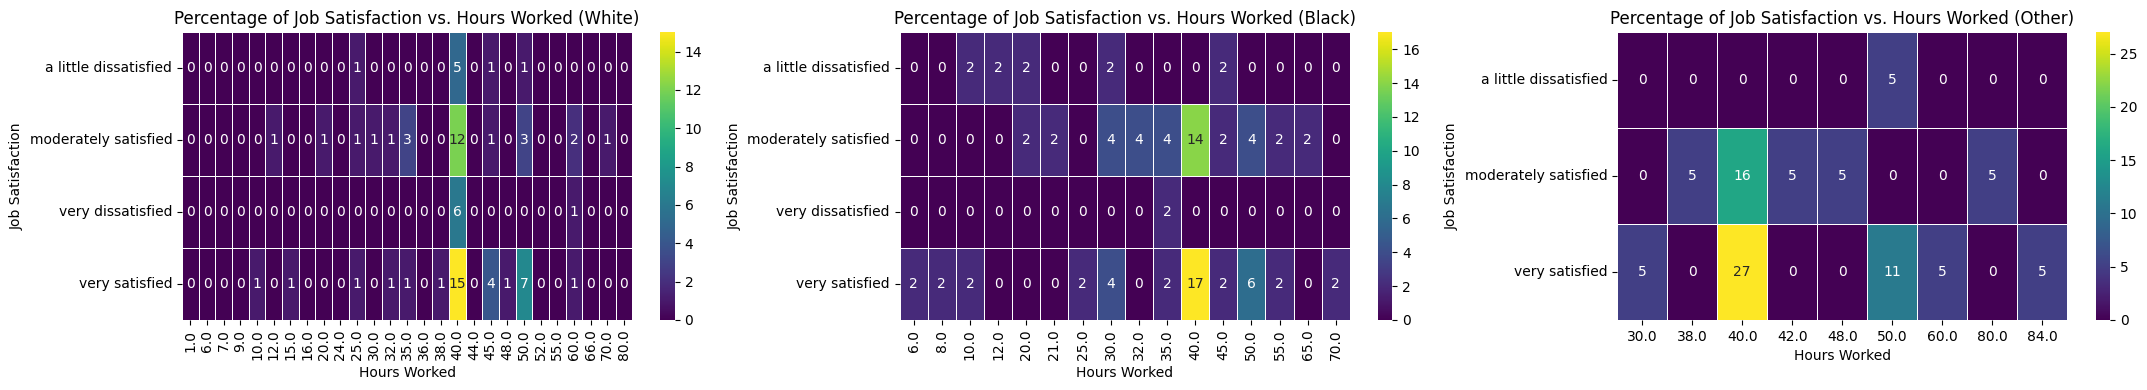

In [38]:
# Heatmap of overall job satisfaction vs. hours worked in percentage separated by race (black, white, other)
df_white = df[df['race'] == 'white'] # create new separate dataframe for all races
df_black = df[df['race'] == 'black']
df_other = df[df['race'] == 'other']

data_w = df_white.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0) # get counts for each combination of job satisfaction and hours worked for white/black/other
data_b = df_black.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)
data_o = df_other.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)

data_w_percent = (data_w / data_w.sum().sum() * 100).astype(int) # convert counts to percent
data_b_percent = (data_b / data_b.sum().sum() * 100).astype(int)
data_o_percent = (data_o / data_o.sum().sum() * 100).astype(int)

fig, axes = plt.subplots(1, 3, figsize=(22, 4))

plot_w = sns.heatmap(data_w_percent, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[0]) # plot white heatmap
plot_w.set_title('Percentage of Job Satisfaction vs. Hours Worked (White)')
plot_w.set_xlabel('Hours Worked')
plot_w.set_ylabel('Job Satisfaction')

plot_b = sns.heatmap(data_b_percent, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[1]) # plot black heatmap
plot_b.set_title('Percentage of Job Satisfaction vs. Hours Worked (Black)')
plot_b.set_xlabel('Hours Worked')
plot_b.set_ylabel('Job Satisfaction')

plot_o = sns.heatmap(data_o_percent, cmap='viridis', annot=True, fmt='d', linewidths=0.5, ax=axes[2]) # plot other heatmap
plot_o.set_title('Percentage of Job Satisfaction vs. Hours Worked (Other)')
plot_o.set_xlabel('Hours Worked')
plot_o.set_ylabel('Job Satisfaction')

plt.tight_layout()
plt.show()

<ipython-input-39-bfd3e24e0fe1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.violinplot(data=df,x='job_satisfaction',y='hours_worked',palette=sns.color_palette("viridis"))
<ipython-input-39-bfd3e24e0fe1>:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  plot = sns.violinplot(data=df,x='job_satisfaction',y='hours_worked',palette=sns.color_palette("viridis"))


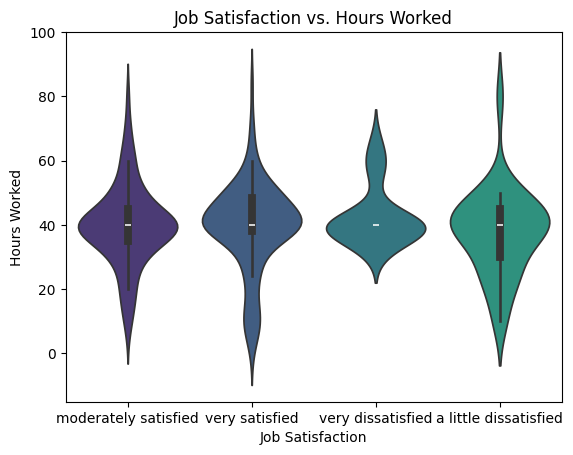

In [39]:
# Violin plot of job satisfaction vs. hours worked
plot = sns.violinplot(data=df,x='job_satisfaction',y='hours_worked',palette=sns.color_palette("viridis"))
plot.set_title('Job Satisfaction vs. Hours Worked') # add labels
plot.set_xlabel('Job Satisfaction')
plot.set_ylabel('Hours Worked')
plt.show()

In [40]:
# Recode job satisfaction from string to numeric 1 meaning least and 4 meaning most satisfied
df['job_satisfaction'] = df['job_satisfaction'].replace(['very satisfied'], 4)
df['job_satisfaction'] = df['job_satisfaction'].replace(['moderately satisfied'], 3)
df['job_satisfaction'] = df['job_satisfaction'].replace(['a little dissatisfied'], 2)
df['job_satisfaction'] = df['job_satisfaction'].replace(['very dissatisfied'], 1)

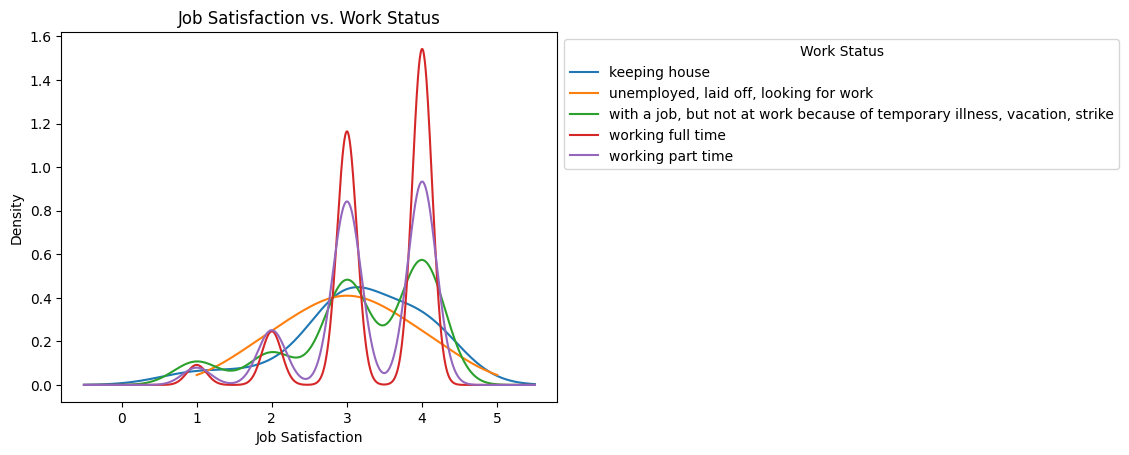

In [41]:
# Kernal density plot of job satisfaction vs. work status
df1 = df.pivot(columns='work_status',values='job_satisfaction')
df1.plot.density()
plt.title('Job Satisfaction vs. Work Status') # add labels
plt.xlabel('Job Satisfaction')
plt.legend(title='Work Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

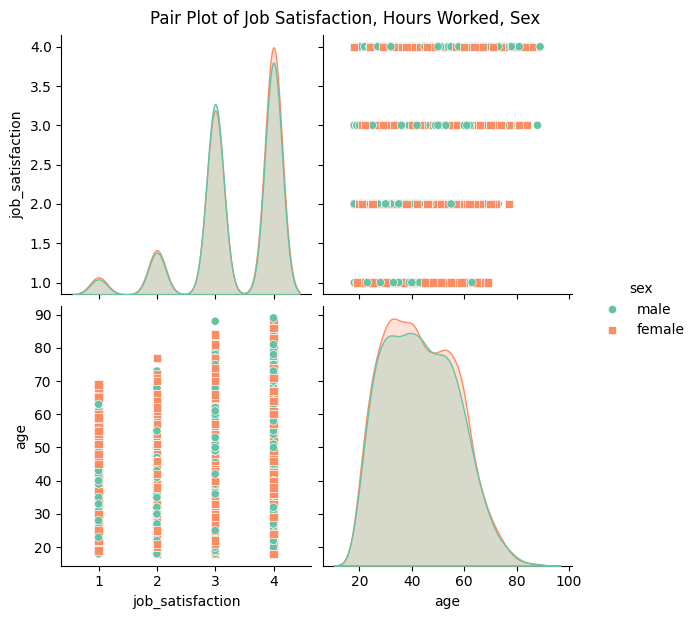

In [42]:
# Pairplot of job satisfaction vs. hours worked grouped by sex
df2 = df[['job_satisfaction','sex','age']]
pair_plot = sns.pairplot(df2, hue='sex', palette='Set2', markers=['o','s'],diag_kind='kde', height=3)
pair_plot.fig.suptitle('Pair Plot of Job Satisfaction, Hours Worked, Sex', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


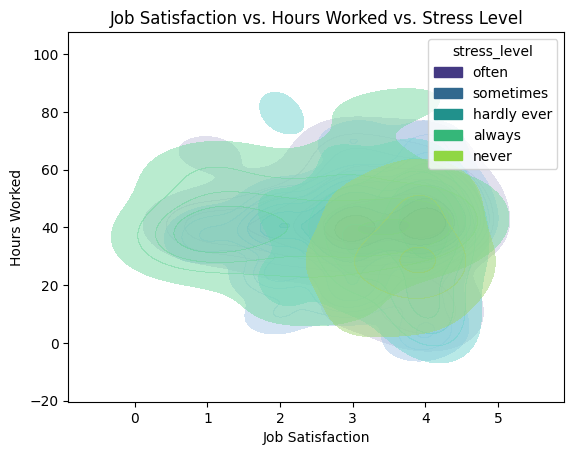

In [43]:
# Kernal density plot of job satisfaction vs. hours worked grouped by stress level
kde_plot = sns.kdeplot(data=df, x='job_satisfaction', y='hours_worked', hue='stress_level', fill=True, palette='viridis', alpha=0.5, linewidths=1) # added alpha to increase transparency
kde_plot.set_title('Job Satisfaction vs. Hours Worked vs. Stress Level')
kde_plot.set_xlabel('Job Satisfaction')
kde_plot.set_ylabel('Hours Worked')
plt.show()

<ipython-input-44-ac213624b324>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=df, x='income', y='job_satisfaction', palette='viridis', order=inc_order)
<ipython-input-44-ac213624b324>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')


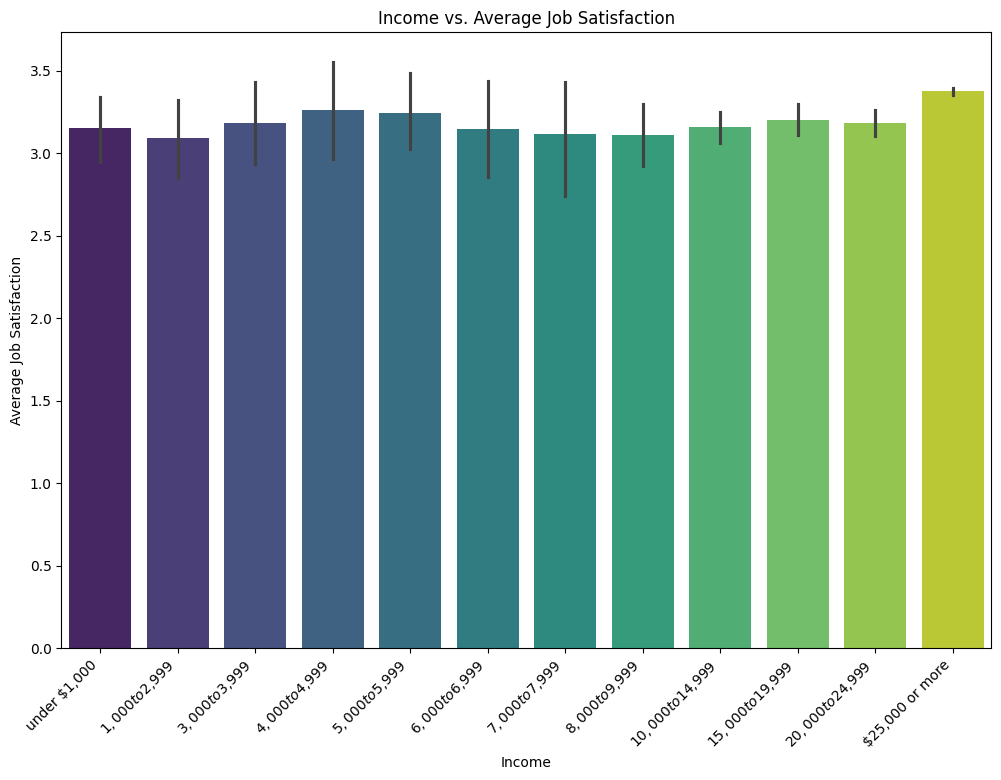

In [44]:
# Bargraph of income vs. average job satisfaction
plt.figure(figsize=(12, 8))
inc_order = ['under $1,000', '$1,000 to $2,999', '$3,000 to $3,999', '$4,000 to $4,999','$5,000 to $5,999','$6,000 to $6,999','$7,000 to $7,999','$8,000 to $9,999','$10,000 to $14,999','$15,000 to $19,999','$20,000 to $24,999','$25,000 or more'] # want to order bars from least to greatest income
plot = sns.barplot(data=df, x='income', y='job_satisfaction', palette='viridis', order=inc_order)
plot.set_title('Income vs. Average Job Satisfaction') # add labels
plot.set_xlabel('Income')
plot.set_ylabel('Average Job Satisfaction')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.show()